<a href="https://colab.research.google.com/github/ylizama/SS2021/blob/main/Class_3_Professor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modelling #2

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
# restart runtime after executing this code. 

In [ ]:
!spacy download en_core_web_sm
import spacy

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import sys
import os
import re, numpy as np, pandas as pd
from pprint import pprint
import nltk

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
import gensim.utils
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'could', 'also'])

## Loading data

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Presentare.csv to Presentare (1).csv


In [10]:
import pandas as pd

In [45]:
df = pd.read_csv('Presentare.csv', sep='\t')
df = df.fillna("")
df.columns

Index(['ID', 'Title', 'Content ', 'Artist Name'], dtype='object')

In [47]:
list(df['Content '])[0]

'We met Lea Rasovszky in the summer of 2013 and have been in love with her artistic activity ever since. Find out more in our exclusive interview with Lea.\n\nYou�ve been active lately, with several exhibitions such as Dark Matters @ Calup or RABBITS @ NAG. What was the most important art related moment of the year for you?\n\nMy natural rhythm is more active than that. This year was a little slow for my taste. A number of projects with great potential have been left aside or have been delayed because of endless logistic problems and production budget. However, I�m happy that those you mentioned were still possible, they meant a lot to me and were very interesting collaborations with great people!\n\nTaken one by one, Dark Matters was an unexpected initiative, I was invited to do a site specific project in a very interesting location where I could test freely and relaxed an old thought that concerned me (Primary Nation), and came out as a kick ass result that I enjoyed  + a very cool c

## Number of Documents

In [48]:
df.columns =  ['ID', 'Title', 'Content', 'Artist Name']
data = list(df['Content'])
len(data)

40

## Tokenizing and cleaning data

In [49]:
import re
import gensim
from gensim.utils import simple_preprocess
def clean_text(texts):
    for sent in texts:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

data_0  = list(clean_text(data))
len(data_0)

40

## Bigrams-Trigrams Models

In [56]:
import nltk

xx= pd.Series(nltk.ngrams(data_0, 1)).value_counts()
as_dataframe= xx.to_frame("count")
#reqd_Index = as_dataframe[as_dataframe['count']<=100].index.tolist()
#lowest_frequency_unigrams =[]
#for element in reqd_Index:
#    lowest_frequency_unigrams.append(element)
#lowest_frequency_unigrams.append("1")
#lowest_frequency_unigrams.append("\ufeff1")

#print ("lowest_frequency_unigrams",len(lowest_frequency_unigrams))

data =[]
for text in data_0:
    temporal_variable=[]
    for word in text:
        #if word not in lowest_frequency_unigrams:
           temporal_variable.append(word)
    temporal_variable= " ".join(temporal_variable)
    data.append(temporal_variable)
#12
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])



[['we', 'met', 'lea', 'rasovszky', 'in', 'the', 'summer', 'of', 'and', 'have', 'been', 'in', 'love', 'with', 'her', 'artistic', 'activity', 'ever', 'since', 'find', 'out', 'more', 'in', 'our', 'exclusive', 'interview', 'with', 'lea', 'you', 've', 'been', 'active', 'lately', 'with', 'several', 'exhibitions', 'such', 'as', 'dark', 'matters', 'calup', 'or', 'rabbits', 'nag', 'what', 'was', 'the', 'most', 'important', 'art', 'related', 'moment', 'of', 'the', 'year', 'for', 'you', 'my', 'natural', 'rhythm', 'is', 'more', 'active', 'than', 'that', 'this', 'year', 'was', 'little', 'slow', 'for', 'my', 'taste', 'number', 'of', 'projects', 'with', 'great', 'potential', 'have', 'been', 'left', 'aside', 'or', 'have', 'been', 'delayed', 'because', 'of', 'endless', 'logistic', 'problems', 'and', 'production', 'budget', 'however', 'happy', 'that', 'those', 'you', 'mentioned', 'were', 'still', 'possible', 'they', 'meant', 'lot', 'to', 'me', 'and', 'were', 'very', 'interesting', 'collaborations', 'wit

In [57]:
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['we', 'met', 'lea_rasovszky', 'in', 'the', 'summer', 'of', 'and', 'have', 'been', 'in', 'love', 'with', 'her', 'artistic', 'activity', 'ever', 'since', 'find_out', 'more', 'in', 'our', 'exclusive_interview', 'with', 'lea', 'you', 've', 'been', 'active', 'lately', 'with', 'several', 'exhibitions', 'such', 'as', 'dark', 'matters', 'calup', 'or', 'rabbits', 'nag', 'what', 'was', 'the', 'most', 'important', 'art', 'related', 'moment', 'of', 'the', 'year', 'for', 'you', 'my', 'natural', 'rhythm', 'is', 'more', 'active', 'than', 'that', 'this', 'year', 'was', 'little', 'slow', 'for', 'my', 'taste', 'number', 'of', 'projects', 'with', 'great', 'potential', 'have', 'been', 'left', 'aside', 'or', 'have', 'been', 'delayed', 'because', 'of', 'endless', 'logistic', 'problems', 'and', 'production', 'budget', 'however', 'happy', 'that', 'those', 'you', 'mentioned', 'were', 'still', 'possible', 'they', 'meant', 'lot', 'to', 'me', 'and', 'were', 'very', 'interesting', 'collaborations', 'with', 'great

In [58]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [59]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load("en_core_web_sm")


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized)

[['meet', 'rasovszky', 'summer', 'be', 'love', 'artistic', 'activity', 'ever', 'find', 'more', 'exclusive', 'interview', 'lea', 'be', 'active', 'lately', 'several', 'exhibition', 'such', 'dark', 'matter', 'calup', 'rabbit', 'nag', 'most', 'important', 'art', 'related', 'moment', 'year', 'natural', 'rhythm', 'more', 'active', 'year', 'be', 'little', 'slow', 'taste', 'number', 'project', 'great', 'potential', 'leave', 'aside', 'delay', 'endless', 'logistic', 'problem', 'production', 'budget', 'however', 'happy', 'mention', 'still', 'possible', 'mean', 'lot', 'be', 'very', 'interesting', 'collaboration', 'great', 'people', 'take', 'dark', 'matter', 'be', 'unexpected', 'initiative', 'invite', 'do', 'site', 'specific', 'project', 'very', 'interesting', 'location', 'where', 'test', 'freely', 'relax', 'old', 'thought', 'concern', 'primary', 'nation', 'come', 'kick', 'ass', 'result', 'enjoy', 'very', 'cool', 'collaboration', 'wonderful', 'people', 'calup', 'primary', 'nation', 'primary', 'nati

In [60]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['we', 'met', 'lea_rasovszky', 'in', 'the', 'summer', 'of', 'and', 'have', 'been', 'in', 'love', 'with', 'her', 'artistic', 'activity', 'ever', 'since', 'find_out', 'more', 'in', 'our', 'exclusive_interview', 'with', 'lea', 'you', 've', 'been', 'active', 'lately', 'with', 'several', 'exhibitions', 'such', 'as', 'dark', 'matters', 'calup', 'or', 'rabbits', 'nag', 'what', 'was', 'the', 'most', 'important', 'art', 'related', 'moment', 'of', 'the', 'year', 'for', 'you', 'my', 'natural', 'rhythm', 'is', 'more', 'active', 'than', 'that', 'this', 'year', 'was', 'little', 'slow', 'for', 'my', 'taste', 'number', 'of', 'projects', 'with', 'great', 'potential', 'have', 'been', 'left', 'aside', 'or', 'have', 'been', 'delayed', 'because', 'of', 'endless', 'logistic', 'problems', 'and', 'production', 'budget', 'however', 'happy', 'that', 'those', 'you', 'mentioned', 'were', 'still', 'possible', 'they', 'meant', 'lot', 'to', 'me', 'and', 'were', 'very', 'interesting', 'collaborations', 'with', 'great

In [61]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
import gensim.utils
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [62]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 7), (15, 3), (16, 3), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 18), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 2), (33, 1), (34, 2), (35, 4), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 2), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 3), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 2), (99, 1), (100, 2), (101, 1), (102, 1), (103, 2), (104, 2), (105, 1), (106, 2), (107, 2), (108, 2), (109, 3), (110, 1

In [63]:
#12.0
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [64]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

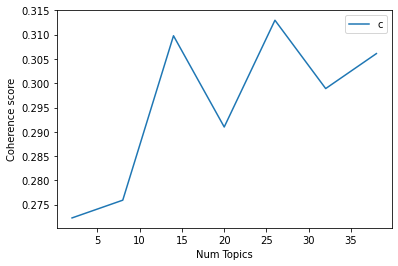

In [65]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [66]:
for m, cv in zip (x,coherence_values):
    print ("num topics= ", m, "has Coherence Value of", round (cv,4))

num topics=  2 has Coherence Value of 0.2723
num topics=  8 has Coherence Value of 0.2759
num topics=  14 has Coherence Value of 0.3098
num topics=  20 has Coherence Value of 0.291
num topics=  26 has Coherence Value of 0.313
num topics=  32 has Coherence Value of 0.2989
num topics=  38 has Coherence Value of 0.3061


In [67]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.019*"be" + 0.012*"work" + 0.008*"art" + 0.008*"color" + 0.006*"so" + 0.006*"street" + 0.006*"draw" + 0.005*"have" + 0.005*"think" + 0.005*"how"'), (1, '0.019*"be" + 0.012*"pablo" + 0.011*"work" + 0.010*"death" + 0.009*"herrero" + 0.009*"more" + 0.009*"exhibition" + 0.008*"way" + 0.008*"gallery" + 0.008*"garden"'), (2, '0.018*"work" + 0.014*"be" + 0.010*"more" + 0.010*"group" + 0.009*"need" + 0.008*"rule" + 0.007*"ungureanu" + 0.006*"see" + 0.006*"individual" + 0.006*"ant"'), (3, '0.029*"work" + 0.020*"be" + 0.014*"also" + 0.011*"artist" + 0.009*"use" + 0.007*"art" + 0.007*"more" + 0.007*"think" + 0.007*"how" + 0.007*"part"'), (4, '0.033*"be" + 0.015*"work" + 0.009*"think" + 0.009*"art" + 0.008*"have" + 0.007*"life" + 0.007*"gallery" + 0.007*"man" + 0.007*"also" + 0.006*"artist"'), (5, '0.018*"be" + 0.011*"work" + 0.010*"courtesy" + 0.010*"gallery" + 0.009*"collection" + 0.008*"sculpture" + 0.008*"medium" + 0.008*"art" + 0.008*"street" + 0.006*"mixed"'), (6, '0.032*"be" + 0.016*

In [68]:
print(optimal_model.print_topics())
doc_lda = optimal_model[corpus]

[(0, '0.019*"be" + 0.012*"work" + 0.008*"art" + 0.008*"color" + 0.006*"so" + 0.006*"street" + 0.006*"draw" + 0.005*"have" + 0.005*"think" + 0.005*"how"'), (1, '0.019*"be" + 0.012*"pablo" + 0.011*"work" + 0.010*"death" + 0.009*"herrero" + 0.009*"more" + 0.009*"exhibition" + 0.008*"way" + 0.008*"gallery" + 0.008*"garden"'), (2, '0.018*"work" + 0.014*"be" + 0.010*"more" + 0.010*"group" + 0.009*"need" + 0.008*"rule" + 0.007*"ungureanu" + 0.006*"see" + 0.006*"individual" + 0.006*"ant"'), (3, '0.029*"work" + 0.020*"be" + 0.014*"also" + 0.011*"artist" + 0.009*"use" + 0.007*"art" + 0.007*"more" + 0.007*"think" + 0.007*"how" + 0.007*"part"'), (4, '0.033*"be" + 0.015*"work" + 0.009*"think" + 0.009*"art" + 0.008*"have" + 0.007*"life" + 0.007*"gallery" + 0.007*"man" + 0.007*"also" + 0.006*"artist"'), (5, '0.018*"be" + 0.011*"work" + 0.010*"courtesy" + 0.010*"gallery" + 0.009*"collection" + 0.008*"sculpture" + 0.008*"medium" + 0.008*"art" + 0.008*"street" + 0.006*"mixed"'), (6, '0.032*"be" + 0.016*

In [69]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word,mds='mmds')
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.000835  0.033035       1        1  46.397750
7     -0.000801 -0.068359       2        1  14.984689
4     -0.108454  0.001460       3        1  13.925219
1     -0.089477  0.122089       4        1   6.335479
5      0.137080 -0.097460       5        1   6.219453
3      0.100742  0.016659       6        1   4.771320
0      0.058642  0.122498       7        1   4.296510
2     -0.098565 -0.129922       8        1   3.069579, topic_info=          Term        Freq       Total Category  logprob  loglift
312       work  404.000000  404.000000  Default  30.0000  30.0000
23          be  692.000000  692.000000  Default  29.0000  29.0000
156       more  173.000000  173.000000  Default  28.0000  28.0000
6         also  117.000000  117.000000  Default  27.0000  27.0000
165       need   53.000000   53.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
976        get    3.093741   51.608529   Topic8  -5.5073   0.6693
674  character    3.080373   53.362124   Topic8  -5.5116   0.6316
84        find    3.104338   58.435012   Topic8  -5.5039   0.5485
282      thing    3.115860   78.919005   Topic8  -5.5002   0.2517
14         art    3.171923  283.647015   Topic8  -5.4823  -1.0098

[597 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2748      1  0.338703      absorb
2748      8  0.338703      absorb
2631      5  0.866957  acceptance
318       1  0.309125     acrylic
318       2  0.309125     acrylic
...     ...       ...         ...
314       3  0.058892        year
314       4  0.058892        year
314       5  0.035335        year
314       6  0.070670        year
314       7  0.011778        year

[1244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 2, 6, 4, 1, 3])

In [70]:
#12.6 Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(19, '0.000*"be" + 0.000*"work" + 0.000*"art" + 0.000*"have" + 0.000*"very" + 0.000*"space" + 0.000*"more" + 0.000*"how" + 0.000*"try" + 0.000*"color"'), (20, '0.000*"work" + 0.000*"be" + 0.000*"death" + 0.000*"art" + 0.000*"gallery" + 0.000*"space" + 0.000*"have" + 0.000*"people" + 0.000*"exhibition" + 0.000*"so"'), (21, '0.001*"be" + 0.000*"work" + 0.000*"have" + 0.000*"art" + 0.000*"other" + 0.000*"project" + 0.000*"when" + 0.000*"also" + 0.000*"more" + 0.000*"how"'), (10, '0.000*"work" + 0.000*"be" + 0.000*"gallery" + 0.000*"exhibition" + 0.000*"death" + 0.000*"cm" + 0.000*"collection" + 0.000*"courtesy" + 0.000*"medium" + 0.000*"sculpture"'), (31, '0.001*"be" + 0.000*"work" + 0.000*"space" + 0.000*"art" + 0.000*"street" + 0.000*"have" + 0.000*"more" + 0.000*"artist" + 0.000*"exhibition" + 0.000*"gallery"'), (35, '0.001*"be" + 0.000*"work" + 0.000*"art" + 0.000*"have" + 0.000*"space" + 0.000*"more" + 0.000*"make" + 0.000*"man" + 0.000*"other" + 0.000*"think"'), (33, '0.001*"work" 